## Import Package

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from operator import itemgetter
from time import time
from sklearn import tree

## Error Visible Calculation

In [2]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

## Input Data

In [3]:
train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('new_cases')
test_labels = test_features.pop('new_cases')

stats.describe(test_labels)

DescribeResult(nobs=30276, minmax=(0, 3419), mean=47.14724534284582, variance=22471.26056417049, skewness=9.251440793059299, kurtosis=126.94251996138914)

## Linear Regression

In [4]:
reg = LinearRegression().fit(train_features ,train_labels)
s_linear_reg = r2_score(train_labels,reg.predict(train_features))
s_linear_reg_test = r2_score(test_labels,reg.predict(test_features))
print(s_linear_reg,s_linear_reg_test)
print(mean_squared_error(train_labels,reg.predict(train_features)),mean_squared_error(test_labels,reg.predict(test_features)))


0.04414114340072417 0.04658798484593629
22742.944156434736 21423.66218212306


## Lasso Regression

In [5]:
reg = Lasso().fit(train_features ,train_labels)
s_Lasso_reg = r2_score(train_labels,reg.predict(train_features))
s_Lasso_reg_test = r2_score(test_labels,reg.predict(test_features))
print(s_Lasso_reg,s_Lasso_reg_test)
print(mean_squared_error(train_labels,reg.predict(train_features)),mean_squared_error(test_labels,reg.predict(test_features)))

0.04412014077403115 0.04659170719166894
22743.44387620269 21423.578539084967


## Decision_tree_regression

In [6]:
reg = DecisionTreeRegressor(max_depth=25)
reg.fit(train_features ,train_labels)
s_DT_reg = r2_score(train_labels,reg.predict(train_features))
s_DT_reg_test = r2_score(test_labels,reg.predict(test_features))
print(s_DT_reg,s_DT_reg_test)
print(mean_squared_error(train_labels,reg.predict(train_features)),mean_squared_error(test_labels,reg.predict(test_features)))

0.8045986856327682 0.7668591620376036
4649.223209123811 5238.795477689007


Seems Decision Tree Regression much better 
## Decision Tree Regression depth study

Total sample accuracy mean: 0.767 (std: 0.013)



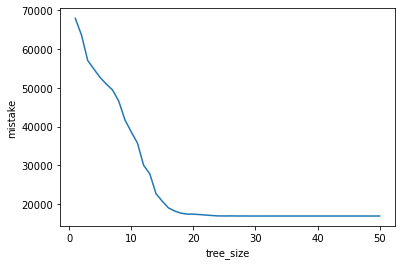

In [15]:
dt_old = DecisionTreeRegressor()
dt_old.fit(train_features, train_labels)
scores = cross_val_score(dt_old, train_features, train_labels, cv=10)
print("Total sample accuracy mean: {:.3f} (std: {:.3f})".format(scores.mean(),scores.std()),end="\n\n" )
misclassification = []
for i in range(1,51):
    #print(i)
    parameters = {'max_depth':range(i,i+1)}
    clf = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
    clf.fit(train_features, train_labels)
    tree_model = clf.best_estimator_
    misclassification.append(clf.best_score_)
for i in range(len(misclassification)):
    misclassification[i] = int((1-misclassification[i])*len(train_features))
    
tree_size=[]
#print(misclassification)
for i in range(len(misclassification)):
    tree_size.append(i+1)


plt.plot(tree_size, misclassification)
plt.xlabel('tree_size')
plt.ylabel('mistake')
plt.show()

# tree_depth should>21

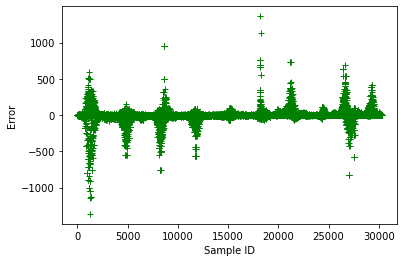

DescribeResult(nobs=30276, minmax=(0.0, 1362.0), mean=24.442113071874985, variance=4721.030481651861, skewness=6.820467416154867, kurtosis=67.56946882805967)

In [12]:
reg = DecisionTreeRegressor(max_depth=21)
reg.fit(train_features ,train_labels)
test_predict = reg.predict(test_features)
#test_labels = test_labels.to_numpy()

error,abserror = errorCalculate(test_labels,test_predict)
plt.plot(error,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(abserror)

In [13]:
r2_score(test_labels,reg.predict(test_features))

0.7633213726086772

In [14]:
mean_squared_error(test_labels,reg.predict(test_features))

5318.291439971965

# save_models

In [12]:
filename = 'flu_DecisionTreeRegression.sav'
joblib.dump(reg, filename)
 

['flu_DecisionTreeRegression.sav']